In [1]:
import pandas as pd
from labs.util.file_processing.loader import load_from_csv

DATAFRAME_PATH: str = "/home/mick/IdeaProjects/DataAnalysisLabs/data-in/phishingData.csv"  # pass here your/path to the phishing.csv
dataframe: pd.DataFrame = load_from_csv(path=DATAFRAME_PATH, delimiter=",")

Execution time for 'load_from_csv' took 0.002029895782470703 seconds


In [2]:
dataframe.head()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1


In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   SFH                1353 non-null   int64
 1   popUpWidnow        1353 non-null   int64
 2   SSLfinal_State     1353 non-null   int64
 3   Request_URL        1353 non-null   int64
 4   URL_of_Anchor      1353 non-null   int64
 5   web_traffic        1353 non-null   int64
 6   URL_Length         1353 non-null   int64
 7   age_of_domain      1353 non-null   int64
 8   having_IP_Address  1353 non-null   int64
 9   Result             1353 non-null   int64
dtypes: int64(10)
memory usage: 105.8 KB


In [4]:
dataframe.corr()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
SFH,1.000000,0.375943,0.368690,0.257247,0.333703,-0.187082,0.151503,0.163182,0.043349,-0.678277
popUpWidnow,0.375943,1.000000,0.218050,0.111520,0.167760,-0.140407,0.136229,0.076815,0.123399,-0.509749
SSLfinal_State,0.368690,0.218050,1.000000,0.057239,0.088525,-0.171719,0.095055,0.208091,0.108000,-0.518762
Request_URL,0.257247,0.111520,0.057239,1.000000,0.337277,-0.045858,0.048431,0.053348,0.013346,-0.271609
URL_of_Anchor,0.333703,0.167760,0.088525,0.337277,1.000000,-0.092045,0.097581,0.069178,0.039412,-0.287007
web_traffic,-0.187082,-0.140407,-0.171719,-0.045858,-0.092045,1.000000,-0.108204,-0.683857,-0.094957,0.243896
URL_Length,0.151503,0.136229,0.095055,0.048431,0.097581,-0.108204,1.000000,0.075338,0.165152,-0.183061
age_of_domain,0.163182,0.076815,0.208091,0.053348,0.069178,-0.683857,0.075338,1.000000,0.040379,-0.231931
having_IP_Address,0.043349,0.123399,0.108000,0.013346,0.039412,-0.094957,0.165152,0.040379,1.000000,-0.059225
Result,-0.678277,-0.509749,-0.518762,-0.271609,-0.287007,0.243896,-0.183061,-0.231931,-0.059225,1.000000


In [5]:
from sklearn.model_selection import train_test_split

target_df = dataframe['Result']
feature_df = dataframe.drop(columns=['Result'])

X_train, X_test, y_train, y_test = train_test_split(feature_df,
                                                    target_df,
                                                    test_size=0.25,
                                                    random_state=2023)
print('Размерность набора данных X_train: ', X_train.shape)
print('Размерность набора данных Y_train: ', y_train.shape)
print('Размерность набора данных X_test: ', X_test.shape)
print('Размерность набора данных Y_test: ', y_test.shape)
print('Перед применением метода кол-во меток со значением -1: {}'.format(sum(y_train == -1)))
print('Перед применением метода кол-во меток со значением 0: {}'.format(sum(y_train == 0)))
print('Перед применением метода кол-во меток со значением 1: {}'.format(sum(y_train == 1)))

Размерность набора данных X_train:  (1014, 9)
Размерность набора данных Y_train:  (1014,)
Размерность набора данных X_test:  (339, 9)
Размерность набора данных Y_test:  (339,)
Перед применением метода кол-во меток со значением -1: 527
Перед применением метода кол-во меток со значением 0: 78
Перед применением метода кол-во меток со значением 1: 409


In [6]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=2023)
X_train, y_train = smote.fit_resample(X_train, y_train)

print('После применением метода кол-во меток со значением -1: {}'.format(sum(y_train == -1)))
print('После применением метода кол-во меток со значением 0: {}'.format(sum(y_train == 0)))
print('После применением метода кол-во меток со значением 1: {}'.format(sum(y_train == 1)))

После применением метода кол-во меток со значением -1: 527
После применением метода кол-во меток со значением 0: 527
После применением метода кол-во меток со значением 1: 527


In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree_param = [{'criterion': ['entropy', 'gini'], 'max_depth': [i for i in range(1, 14)],
               'min_samples_leaf': [i for i in range(2, 16, 2)],
               'max_leaf_nodes': [i for i in range(2, 50, 2)]}]

dtc_model = GridSearchCV(DecisionTreeClassifier(), tree_param, cv=12)
dtc_model.fit(X=X_train.values, y=y_train)

prediction = dtc_model.best_estimator_.predict(X_test)
score = accuracy_score(y_test, prediction)
_confusion_matrix = confusion_matrix(y_test, prediction)
_classification_report = classification_report(y_test, prediction)

print(f'Confusion Matrix:\n{_confusion_matrix}\n{"-" * 100}\n'
      f'Classification report:\n{_classification_report}\n{"-" * 100}\n')
print(f'Лучшие найденные коэффициенты важности: {dtc_model.best_estimator_.feature_importances_}')
print(f'Лучшие найденные параметры: {dtc_model.best_estimator_}')
print(f'Точность на тренировочных данных: {round(dtc_model.best_score_ * 100, 2)}')
print(f'Точность на тестовых данных: {round(score * 100, 2)}')

Confusion Matrix:
[[157   4  14]
 [  0  23   2]
 [ 16   7 116]]
----------------------------------------------------------------------------------------------------
Classification report:
              precision    recall  f1-score   support

          -1       0.91      0.90      0.90       175
           0       0.68      0.92      0.78        25
           1       0.88      0.83      0.86       139

    accuracy                           0.87       339
   macro avg       0.82      0.88      0.85       339
weighted avg       0.88      0.87      0.87       339

----------------------------------------------------------------------------------------------------

Лучшие найденные коэффициенты важности: [0.26759325 0.04250037 0.21597217 0.1481772  0.16605182 0.01057797
 0.10430832 0.0324599  0.01235898]
Лучшие найденные параметры: DecisionTreeClassifier(criterion='entropy', max_depth=13, max_leaf_nodes=46,
                       min_samples_leaf=2)
Точность на тренировочных данных: 92.73

/home/mick/IdeaProjects/DataAnalysisLabs/venv/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


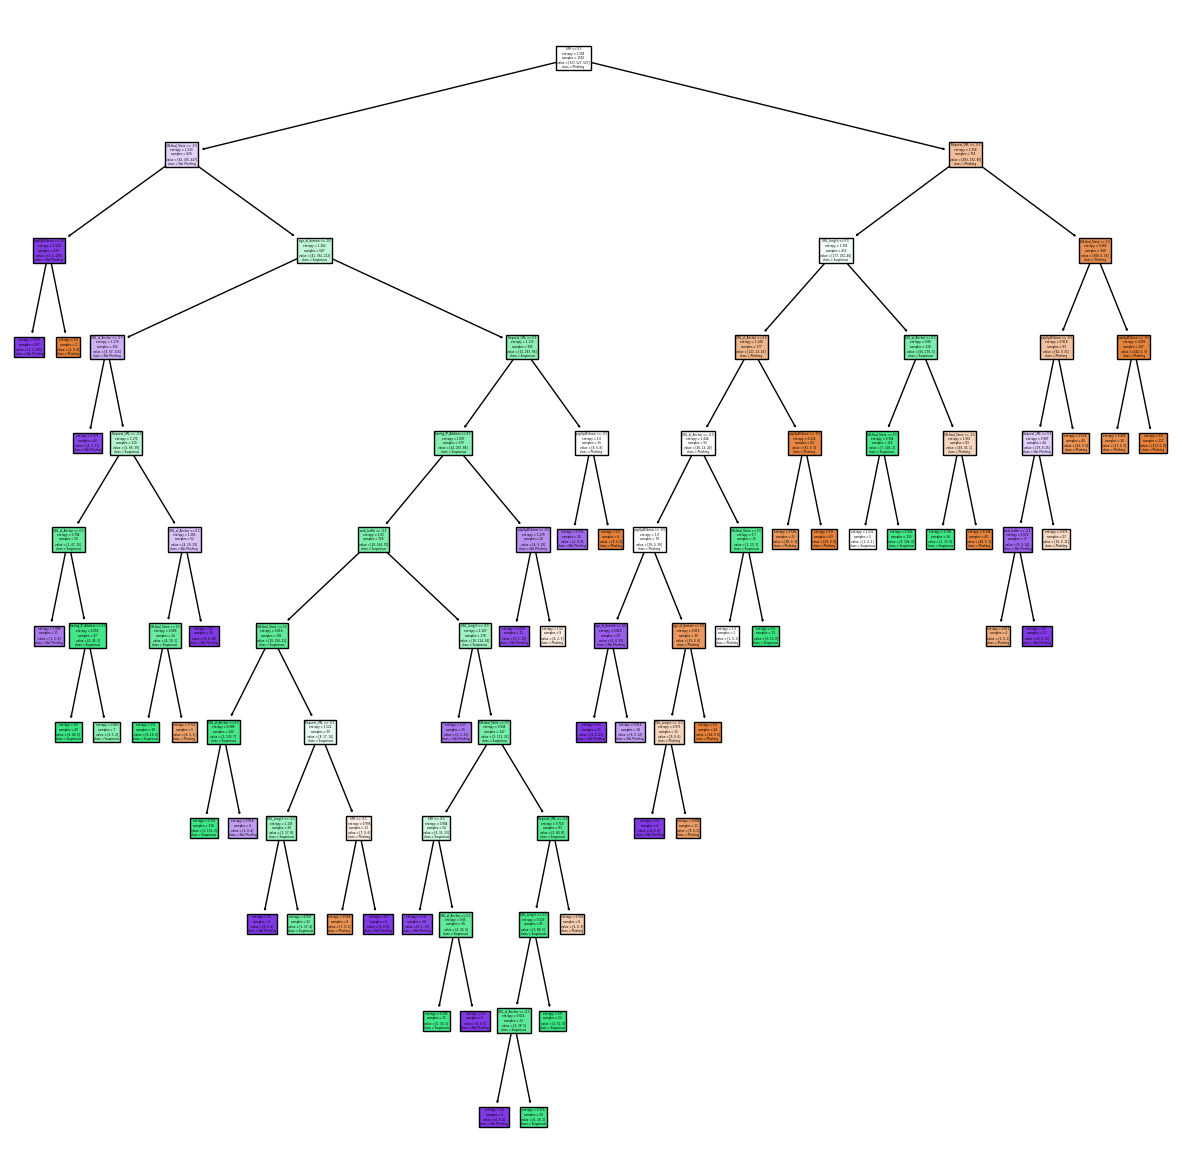

/home/mick/IdeaProjects/DataAnalysisLabs/venv/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


<Figure size 640x480 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

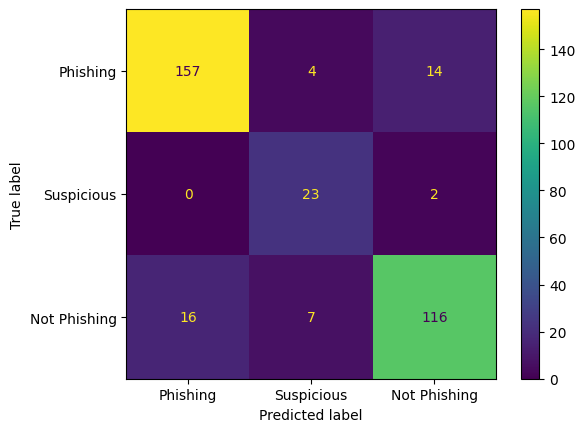

<Figure size 640x480 with 0 Axes>

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

features = ["SFH", "popUpWidnow", "SSLfinal_State", "Request_URL", "URL_of_Anchor", "web_traffic", "URL_Length",
            "age_of_domain", "having_IP_Address"]
classes = ["Phishing", "Suspicious", "Not Phishing"]

plt.figure(figsize=(15, 15))
plot_tree(dtc_model.best_estimator_, feature_names=features, class_names=classes, filled=True)
plt.show()
plt.clf()

plt.figure(figsize=(15, 15))
ConfusionMatrixDisplay.from_estimator(dtc_model.best_estimator_, X_test, y_test, display_labels=classes)
plt.show()
plt.clf()